In [ ]:
# Подключение всех необходимых библиотек 

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline


In [ ]:
# Загрузим данные MNIST
(x_train_org, y_train_org),(x_test_org, y_test_org)= mnist.load_data()

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000,784)
x_test = x_test_org.reshape(10000, 784)

In [ ]:
# Нормализуем входные данные. В промежутке от 0 до 1
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)

In [ ]:
# Создание сети 
model = Sequential()
model.add(Dense(800, input_dim = 784, activation = "relu"))
model.add(Dense(400, activation = "relu"))
model.add(Dense(10,activation = "softmax"))

In [ ]:
# Компиляция модели 
model.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

In [ ]:
# Обучение
model.fit (x_train, y_train, batch_size=128, epochs=15, verbose=1)

# Обучение нейронной сети запускал два раза.  Поэтому результат получился -  accuracy: 1.0000


Epoch 1/15
469/469 [==============================] - 8s 17ms/step - loss: 5.2421e-05 - accuracy: 1.0000
Epoch 2/15
469/469 [==============================] - 8s 16ms/step - loss: 3.3154e-05 - accuracy: 1.0000
Epoch 3/15
469/469 [==============================] - 8s 16ms/step - loss: 2.2120e-05 - accuracy: 1.0000
Epoch 4/15
469/469 [==============================] - 8s 17ms/step - loss: 1.5677e-05 - accuracy: 1.0000
Epoch 5/15
469/469 [==============================] - 8s 16ms/step - loss: 1.1744e-05 - accuracy: 1.0000
Epoch 6/15
469/469 [==============================] - 8s 16ms/step - loss: 8.8012e-06 - accuracy: 1.0000
Epoch 7/15
469/469 [==============================] - 8s 16ms/step - loss: 6.6155e-06 - accuracy: 1.0000
Epoch 8/15
469/469 [==============================] - 8s 16ms/step - loss: 4.9151e-06 - accuracy: 1.0000
Epoch 9/15
469/469 [==============================] - 8s 16ms/step - loss: 3.6703e-06 - accuracy: 1.0000
Epoch 10/15
469/469 [==============================] - 

In [ ]:
# Можно сохранить результат
model.save_weights('teplov_numbers.h5')

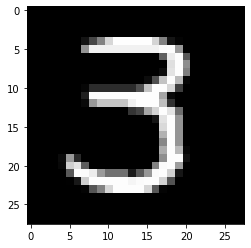

3
3


In [ ]:
# Распознавание
n = 4532   # Номер цифры из выборки
# Вывод данной цифры для примера
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGBA'))
plt.show() 

# Выбираем нужную цифру из выборки и присваеваем ее переменной
x = x_test[n]

# Добавляем размерность 
x = np.expand_dims(x,axis=0)

# Распознаем пример 
predict = model.predict(x)

# Получаем индекс самого большого значения в массиве. Это цифра которую распознала сеть
pred = np.argmax(predict)
print (pred)  #Вывод распознаной цифры на экран

#Проверяем ответ для сравнения 
print (y_test_org[n])

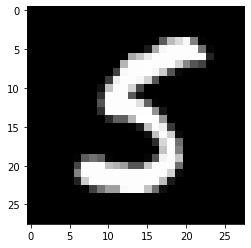

5
5


In [ ]:
# Тот же код, но для проверки другой цифры

n = 8741   
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGBA'))
plt.show() 

x = x_test[n]
x = np.expand_dims(x,axis=0)
predict = model.predict(x)
pred = np.argmax(predict)
print (pred) 
print (y_test_org[n])

In [ ]:
# На написание данной сети с осознанием происходящего ушло больше 2 часов. 